# Introduction 💥
In this notebook, we will explore the data from the Playground Series S3E20 competition, which is about predicting the CO2 emissions in Africa using satellite observations.

> Our goal is to create an accurate machine learning model that can estimate the carbon emission levels across the country for 2022.

We will be using pandas, matplotlib, seaborn, folium, scikit-learn and random forest.

> This notebook got a score of **25.39**

Join me on this journey as we discover how satellite data can help us monitor and fight climate change.

## We will go through
- Most important **competition insights**
- **Discussion topics** that help boost our score 🚀
- Creating aesthetically pleasing visuzalizaions
- A lot of **neat feature engineering**
- Creating easy to use **sklearn pipelines** for preprocessing

## Table of Contents
1. [Libraries 📖](#Libraries-📖)
2. [Load data 📂](#Load-data-📁)
3. [Data analysis 📊](#Data-analysis-📊)
    1. [Train data analysis](#Train-data-analysis)
    1. [Test data analysis](#Test-data-analysis)
4. [Feature engineering 🛠️](#Feature-engineering-🛠️)
    1. [Add date](#Add-date)
    2. [Fix virus year](#Fix-virus-year)
    3. [Drop Uv Aerosol feature group](#Drop-Uv-Aerosol-feature-group)
    4. [Season](#Season)
    5. [Holidays](#Holidays)
    6. [Cyclic features](#Cyclic-features)
    7. [Rotating location](#Rotating-location)
    8. [Clustering](#Clustering)
    8. [Select features](#Select-features)
5. [Preprocessing ⚙️](#Preprocessing-⚙️)
    1. [Split dataset](#Split-dataset)
    2. [Create a pipeline](#Create-a-pipeline)
6. [Modeling 🪄](#Modeling-🪄)
    1. [Model training](#Model-training)
    2. [Model evaluation](#Model-evaluation)
7. [Submission 🏆](#Submission-🏆)
    1. [Fix predictions](#Fix-predictions)
    2. [Lazy predictions](#Lazy-predictions)
    3. [Prediction visualization](#Prediction-visualization)
    4. [Save submission](#Save-submission)
8. [Thank you ✨](#Thank-you-✨)

# Libraries 📖
***

In [2]:
# Holy grail
import numpy as np
import pandas as pd

# Scikit-learn
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Visualization
import matplotlib.pyplot as plt
import branca.colormap as cm
import seaborn as sns
import folium

# Models
from sklearn.ensemble import RandomForestRegressor

# Misc
from haversine import haversine

# Random state
rs = 42

# Load data 📁
***

In [3]:
train = pd.read_csv('../train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test = pd.read_csv('../test.csv', index_col='ID_LAT_LON_YEAR_WEEK')

# Data analysis 📊
***

## Train data analysis

In [4]:
train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

<div style="border-radius: 10px; border: #00d65c solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>✅ Great :</b> Every collumn is numerical so we won't have to deal with categorical data.
</div>

In [6]:
{col.split('_')[0] for col in train.columns}

{'CarbonMonoxide',
 'Cloud',
 'Formaldehyde',
 'NitrogenDioxide',
 'Ozone',
 'SulphurDioxide',
 'UvAerosolIndex',
 'UvAerosolLayerHeight',
 'emission',
 'latitude',
 'longitude',
 'week',
 'year'}

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Observation :</b> Features not used for indexing (latitude, longitude, year and week number) can be split into 8 groups: <i>CarbonMonoxide</i>, <i>Cloud</i>, <i>Formaldehyde</i>, <i>NitrogenDioxide</i>, <i>Ozone</i>, <i>SulphurDioxide</i>, <i>UvAerosolIndex</i> and <i>UvAerosolLayerHeight</i>.
</div>


In [7]:
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(20)

UvAerosolLayerHeight_aerosol_pressure                      78584
UvAerosolLayerHeight_solar_zenith_angle                    78584
UvAerosolLayerHeight_aerosol_height                        78584
UvAerosolLayerHeight_aerosol_optical_depth                 78584
UvAerosolLayerHeight_sensor_zenith_angle                   78584
UvAerosolLayerHeight_sensor_azimuth_angle                  78584
UvAerosolLayerHeight_solar_azimuth_angle                   78584
NitrogenDioxide_NO2_slant_column_number_density            18320
NitrogenDioxide_tropopause_pressure                        18320
NitrogenDioxide_tropospheric_NO2_column_number_density     18320
NitrogenDioxide_absorbing_aerosol_index                    18320
NitrogenDioxide_cloud_fraction                             18320
NitrogenDioxide_sensor_altitude                            18320
NitrogenDioxide_sensor_azimuth_angle                       18320
NitrogenDioxide_sensor_zenith_angle                        18320
NitrogenDioxide_solar_azi

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 📉 Missing values:</b> only columns used for indexing and target don't have missing values.
</div>

<div style="border-radius: 10px; border: #ff001c solid; padding: 15px; margin-top: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🚩 Missing values:</b> Features from the <i>UvAerosolLayerHeight</i> group have over <b>99%</b> missing values. Those columns will propably be removed later.
</div>

In [8]:
# Number of missing values for each year
train.isnull().groupby(train['year']).sum().sum(axis=1)

year
2019    309254
2020    333338
2021    347499
dtype: int64

In [9]:
train[['year', 'emission']].describe()

,year,emission
count,79023.000000,79023.000000
mean,2020.000000,81.940552
std,0.816502,144.299648
min,2019.000000,0.000000
25%,2019.000000,9.797995
50%,2020.000000,45.593445
75%,2021.000000,109.549595
max,2021.000000,3167.768000


In [10]:
# Dataframes for visualization
train_plot = train.copy(deep=True)
train_plot['date'] = pd.to_datetime(train_plot['year'].astype(str) + '-' + train_plot['week_no'].astype(str) + '-1', format='%Y-%W-%w') # 1 is a monday and %w day of week otherwise throws error

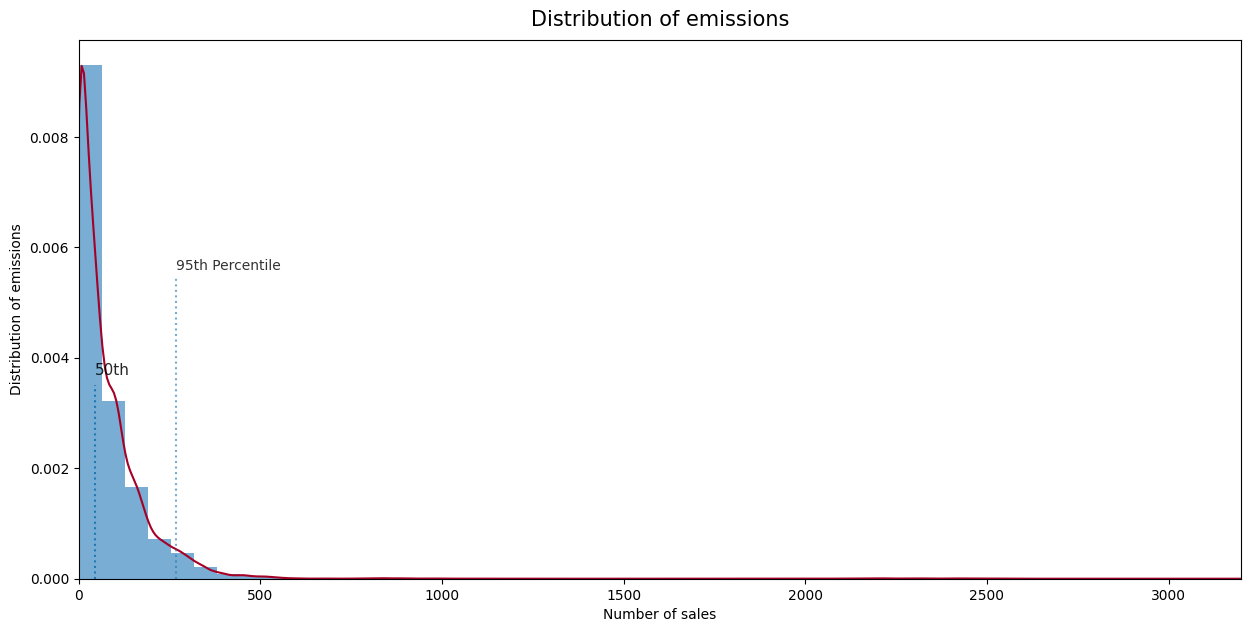

In [11]:
# Plot
train['emission'].plot(kind = "hist", density = True, alpha = 0.65, bins = 50, colormap='tab20c', figsize=(15,10)) # change density to true, because KDE uses density
train['emission'].plot(kind = "kde", colormap='RdYlBu', figsize=(15,7))

# Quantile lines
quant_50, quant_95 = train['emission'].quantile(0.5), train['emission'].quantile(0.95)
quants = [[quant_50, 1, 0.36],  [quant_95, 0.6, 0.56]]
for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

# X
plt.xlabel('Number of sales')
plt.xlim((0, 3200))

# Y
plt.ylabel('Distribution of emissions')

# # Annotations
plt.text(quant_50, .0037, "50th", size=11, alpha=.85)
plt.text(quant_95, .0056, "95th Percentile", size=10, alpha=.8)

plt.title('Distribution of emissions', size=15, pad=10)
plt.show()

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Observation :</b> Most of emission readings aren't higher than 200.
</div>

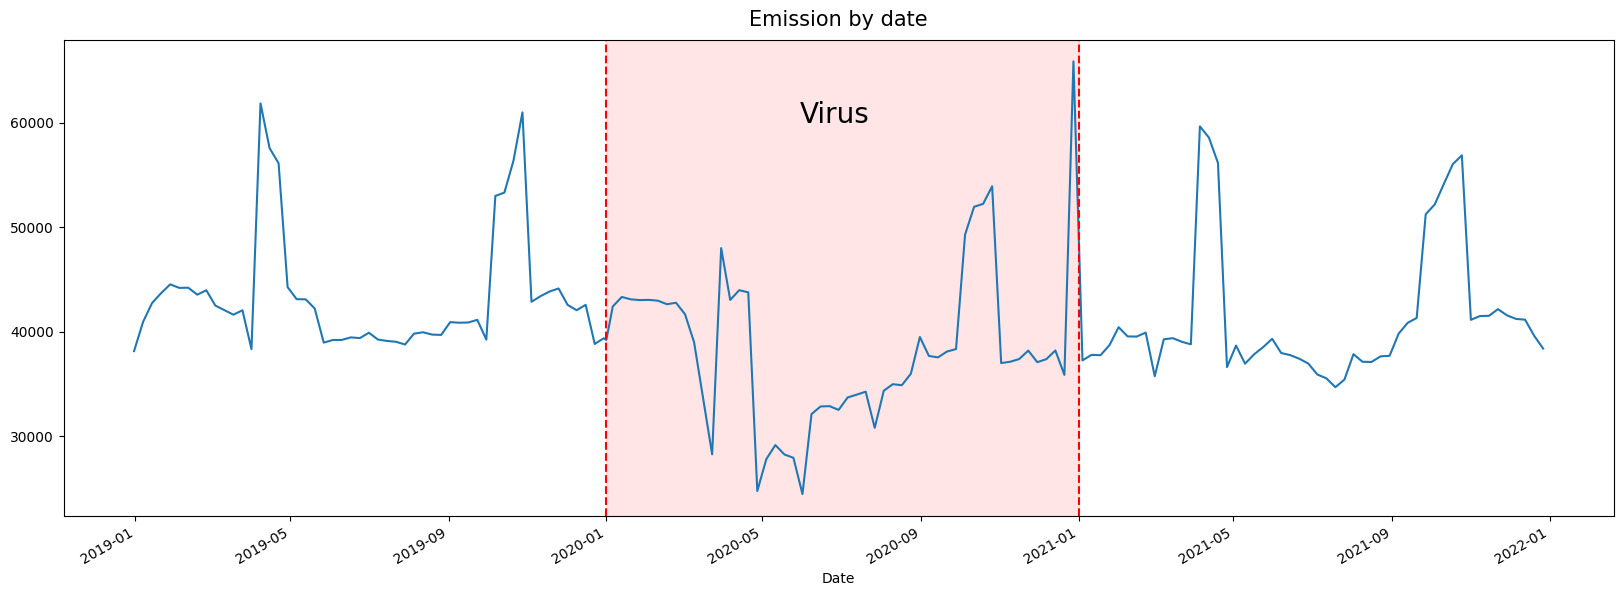

In [12]:
train_plot.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='red', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "--", color='red')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "--", color='red')

plt.text(pd.Timestamp ('2020-05-30'), 60000, "Virus", size = 20)

plt.title('Emission by date', size=15, pad=10)
plt.show()

<div style="border-radius: 10px; border: #ffac00 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> ⚠️ Covid effect:</b> We can see strong affect of virus especially in Q2 of 2020. Because this year contains unique trends it is an outlier it may introduce overfitting to our model so will deal with it later in preprocessing.
</div>


In [13]:
# Since 2020 is wierd I will remove it for this plot
mask = train_plot['date'].dt.year != 2020
train_plot_no_2020 = train_plot[mask]

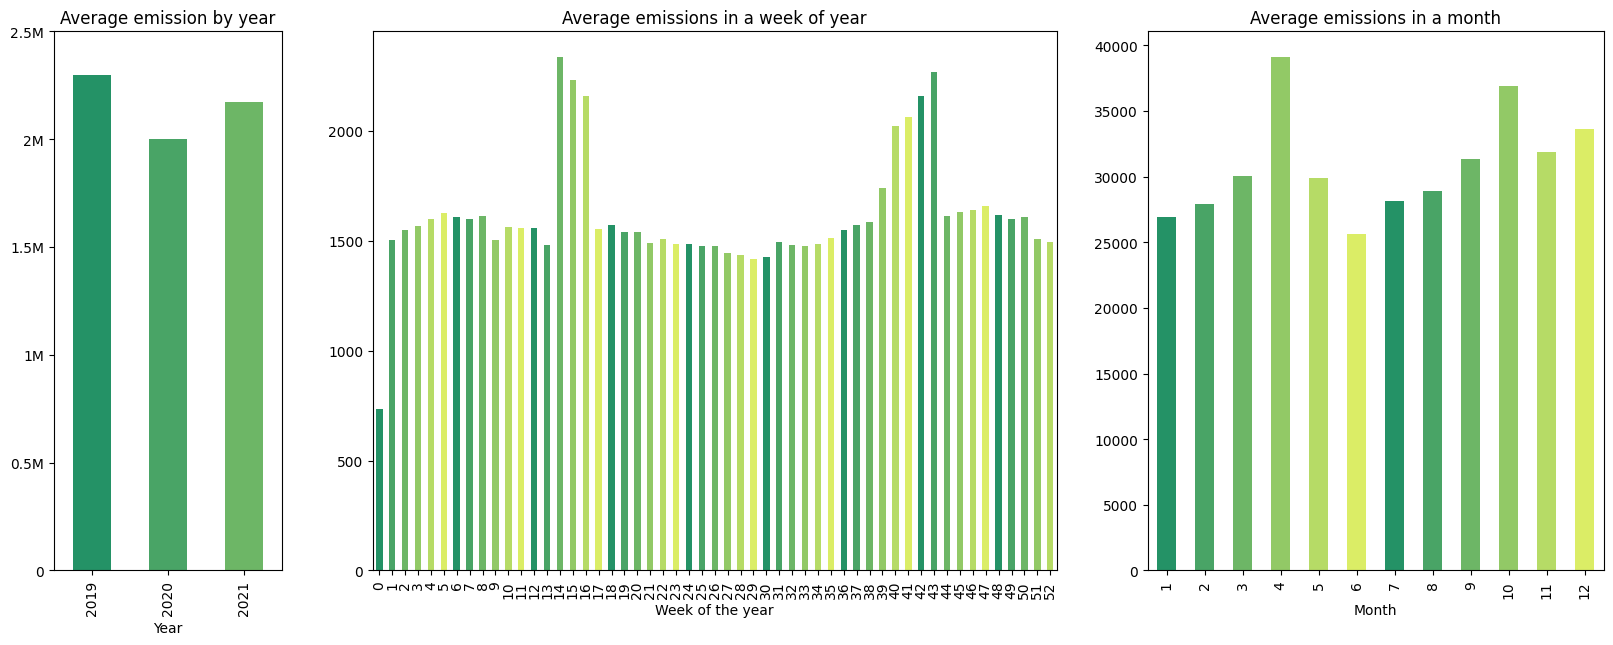

In [14]:
fig, axs = plt.subplots(1, 3, width_ratios=[1, 3, 2], figsize=(20,7))

train_plot.groupby('year')['emission'].sum().plot(kind='bar', title='Average emission by year', xlabel='Year', color=sns.color_palette('summer'), ax=axs[0])

avg_week = train_plot_no_2020.groupby('week_no')['emission'].sum() / 52
avg_week.plot(kind='bar', title='Average emissions in a week of year', xlabel='Week of the year', color=sns.color_palette('summer'), ax=axs[1])

avg_month = train_plot_no_2020.groupby(train_plot['date'].dt.month)['emission'].sum() / 12
avg_month.plot(kind='bar', title='Average emissions in a month', xlabel='Month', color=sns.color_palette('summer'), ax=axs[2])

axs[0].set_xticklabels([2019, 2020, 2021])
axs[0].set_yticks(list(range(0, 3000000, 500000)), ['0', '0.5M', '1M', '1.5M', '2M', '2.5M'])

plt.show()

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Trends :</b> There are visible seasonal trends and 2020 corona effect.
</div>

In [15]:
train.drop_duplicates(subset=['latitude', 'longitude']).shape[0]

497

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Unique locations :</b> Emissions were messured from 497 unique geographical points.
</div>

In [16]:
zero_emissions = train.groupby(['latitude', 'longitude'])['emission'].mean().to_frame()
zero_emissions = zero_emissions[zero_emissions['emission'] == 0]
zero_emissions

,,emission
latitude,longitude,
-2.898,29.002,0.0
-2.859,29.041,0.0
-2.841,29.159,0.0
-2.817,29.283,0.0
-2.496,28.504,0.0
-1.974,28.526,0.0
-1.839,28.761,0.0
-1.833,28.467,0.0
-1.730,28.470,0.0


<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Locations without emissions :</b> Apparently there are 15 locations where emmisions are always 0. 
</div>

In [17]:
# Group the train by 'latitude' and 'longitude' and compute the sum of the 'emission' values for each location
grouped = train.groupby(['latitude', 'longitude'])['emission'].sum().reset_index()

# Create a linear colormap that maps emission values to colors
colormap = cm.LinearColormap(['green', 'red'], vmin=0, vmax=75000) # emssions above 75k will be labeled black

# Create a map centered at the mean latitude and longitude of points
m = folium.Map(location=[grouped['latitude'].mean(), grouped['longitude'].mean()])

# Add a circle marker to the map for each point in grouped dataframe
for _, row in grouped.iterrows():
    rows_emission = row['emission']
    color = 'blue' if rows_emission == 0 else colormap(rows_emission) if rows_emission < 10**5 else 'black'
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=np.sqrt(row['emission'])*15,
        color=color,
        fill=True,
        fill_color= color
    ).add_to(m)

# Fit the map to the bounds of markers
m.fit_bounds(m.get_bounds())

# Display the map
m

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 📉 Breathing CO2:</b> There are 2 locations (black circles) that registered much higher emissions than others. We should investigate that.
</div>

<Axes: title={'center': 'Total emissions by location'}>

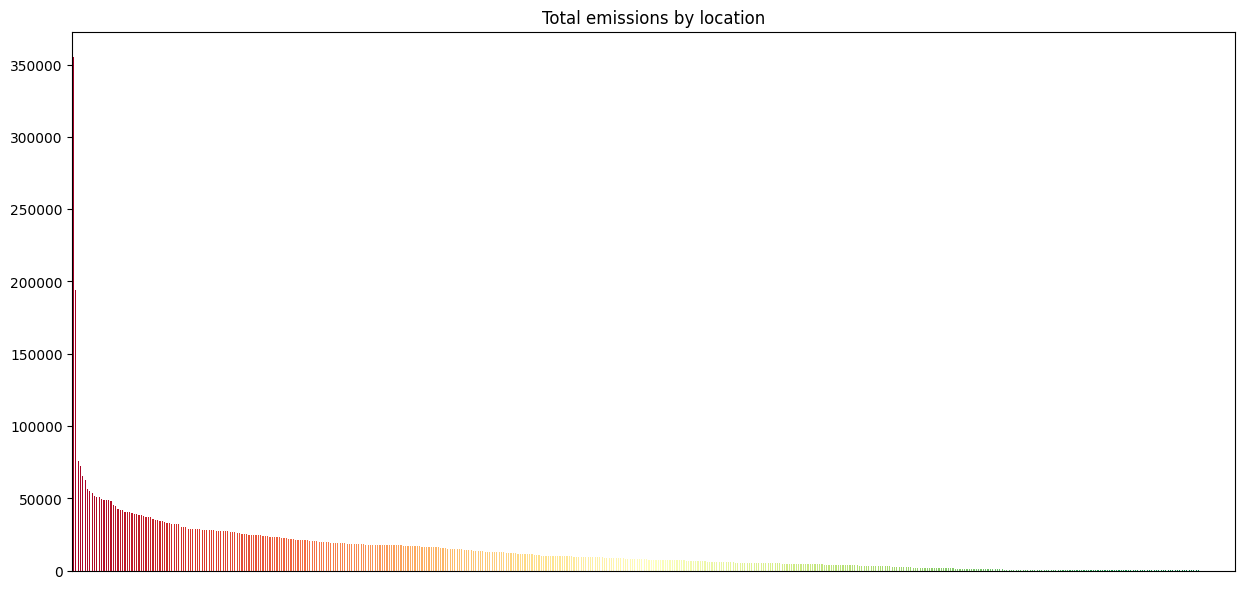

In [18]:
grouped['emission'].sort_values(ascending = False).plot(kind = 'bar', title = 'Total emissions by location', xticks = [], figsize=(15, 7), color=sns.color_palette('RdYlGn', n_colors=497))

<div style="border-radius: 10px; border: #ffac00 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 📉 Suspicious readings:</b> Indeed 2 locations seemed to have registered much higher CO2 emissions. Interesting...
</div>

### Test data analysis
I performed a similar analysis as on the training set and here are the findings.

<div style="border-radius: 10px; border: #00d65c solid; padding: 15px; margin-top: 30px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>✅ Missing values:</b> Our test dataset seems to have similar percentage of missing values as the train set.
</div>

<div style="border-radius: 10px; border: #ffac00 solid; padding: 15px; margin-top: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> ⚠️ Data drift:</b> There is a significant data drift in the <i>UvAerosol</i> features as mentioned in this <a href="https://www.kaggle.com/competitions/playground-series-s3e20/discussion/428566#2374389">discussion topic</a>. This is another reason to drop them. Fortunately other features come from similar distributions so there is not much data drift in them.
</div>

In [19]:
np.array_equal(test[['latitude', 'longitude']].drop_duplicates(subset=['latitude', 'longitude']).values, train[['latitude', 'longitude']].drop_duplicates(subset=['latitude', 'longitude']).values)

True

<div style="border-radius: 10px; border: #00d65c solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>✅ Great :</b> Our test set has the same locations as the train set.
</div>

<div style="background-color: #f0f9ff; border-left: 6px solid #0ea5e9; font-size: 100%; padding: 10px;">
    <h3 style="color: #27374D; font-size: 18px; margin-top: 0; margin-bottom: 10px;">🔎  Summary of analysis</h3>
    <ul>
        <li>There are only numerical features</li>
        <li>Features (excluding ones used for indexing) and target can be put into 8 groups</li>
        <li>Training examples were messured from 2019 to 2021</li>
        <li>Single CO2 emission reading can range from 0.3 to almost 3200</li>
        <li><i>Uv Aerosol</i> feature group has terribly high missing value rate and significant data drift</li>
        <li>Emission values were captured from 497 different locations</li>
        <li>Emissions strongly depend on seasonal/holiday trends</li>
        <li>There are 2 locations with extreamly high emissions recorded</li>
        <li>Test data was messured from the same locations</li>
        <li>The test data consists of first 49 weeks of 2022 - that is what we'll have to predict.</li>
    </ul>
</div>

# Feature engineering 🛠️
***

## Add date

In [20]:
train['date'] = pd.to_datetime(train['year'].astype(str) + '-' + train['week_no'].astype(str) + '-1', format='%Y-%W-%w') # '-1' means Monday, without it to_datetime() raises error 

## Drop Uv Aerosole feature group
Those features should be dropped for two reasons. This group has over **99% missing** values and there is a significant **data drift** between those features in training and tesst sets.

In [21]:
train.drop(columns=['UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_solar_azimuth_angle'], inplace=True)

## Fix virus year

In [22]:
# Calculate the average monthly sales for non-virus years (2019 and 2021)
avg_emission_non_virus = train[train['year'].isin((2019,2021))].groupby('week_no')['emission'].mean()

# Calculate the average monthly for virus year (2020)
avg_emission_virus = train[train['year'] == 2020].groupby('week_no')['emission'].mean()

# Calculate the ratios for each month
ratios_for_weeks = avg_emission_non_virus/avg_emission_virus

# Multiply the num_sold column for each row in 2020 by the corresponding ratio for the week of that row
train.loc[train['year'] == 2020, 'emission'] *= train['week_no'].map(ratios_for_weeks)

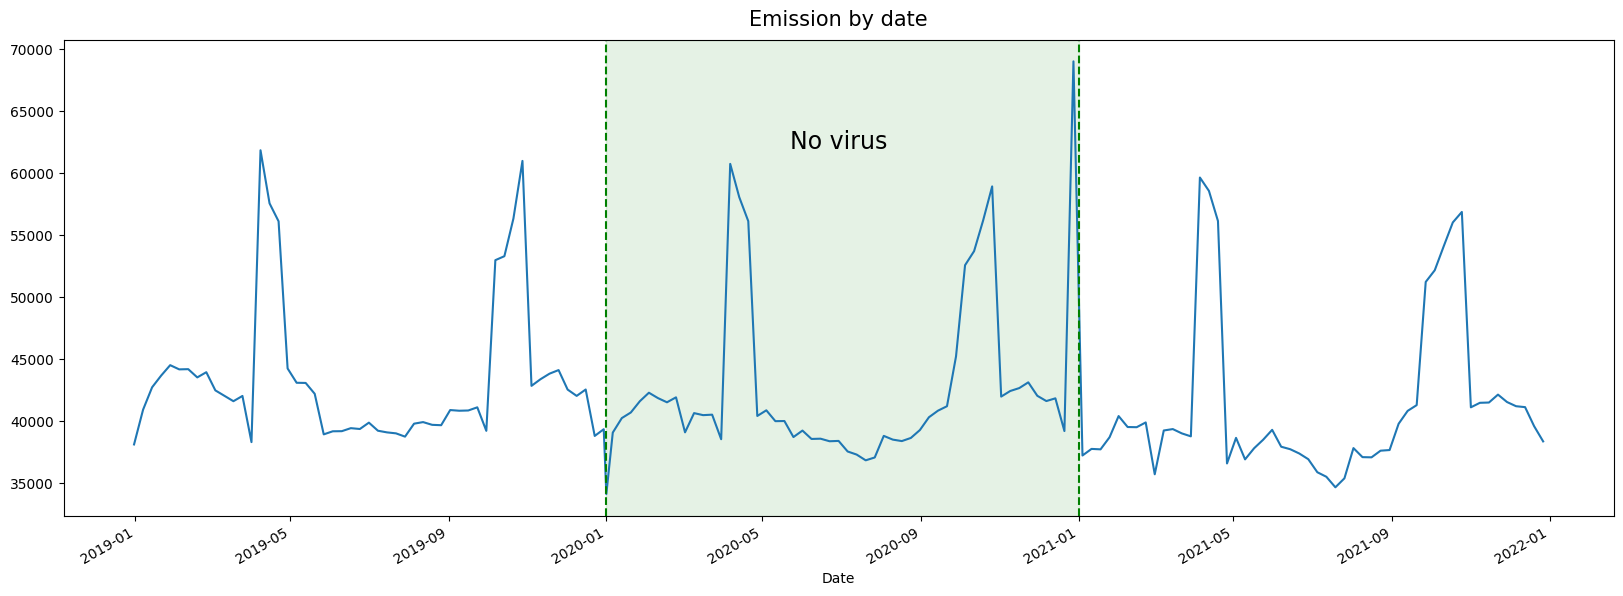

In [23]:
train.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='green', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "--", color='green')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "--", color='green')

plt.text(pd.Timestamp('2020-05-22'), 62000, "No virus", size = 17)

plt.title('Emission by date', size=15, pad=10)
plt.show()

<div style="border-radius: 10px; border: #7c3aed solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Covid fix :</b> For more detailed explanation of how and why that works I shamelessly provide my <a href="https://www.kaggle.com/competitions/playground-series-s3e20/discussion/429622#2376568">discussion topic</a>.
</div>

In [24]:
# Let's fix the large spike in the last week of 2020. It's an outlier.
train.loc[(train['week_no'] == 52) & (train['year'] == 2020), 'emission'] = np.power(train.loc[(train['week_no'] == 52) & (train['year'] == 2020), 'emission'], 1/1.5)

## Season
Overall Rwanda's four climactic seasons are represented through the **long rainy season**: March to May, and **short rainy season**: September to November. These seasons alternate with the **long dry season**: June to August, and **short dry season**: December to February. Using that knowledge we will add `season` feature with **seasons labeled from 1 to 4**.

In [25]:
train['season'] = train['date'].dt.month.apply(lambda x: 1 if 3 <= x <= 5 else 2 if 6 <= x <= 8 else 3 if 9 <= x <= 11 else 4)

<div style="border-radius: 10px; border: #ffac00 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🏆 LB score:</b> Using <i>season</i> as a feature has negligible impact on the LB score by lowering it by 0.006 but it introduces more overfitting to a model so I won't use it for training.
</div>

## Holidays

In [26]:
train['holidays'] = (train['week_no'].isin([0, 51, 12, 30]))

## Cyclic features

In [27]:
train['week_sin'] = np.sin(2 * np.pi * train['week_no']/53)
train['week_cos'] = np.cos(2 * np.pi * train['week_no']/53)

# If season imporved LB and didn't introduce more overfitting it would be a good idea to create cyclic features for it
# train['season_sin'] = np.sin(2 * np.pi * train['season']/4)
# train['season_cos'] = np.cos(2 * np.pi * train['season']/4)

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> 🗓️ Cyclic nature of time :</b> In all the cases, but Year, the features should be split into two parts: sinus and cosine, to reflect cyclicity, e.g. the 1st January is near the 31st December.
</div>

## Rotating location

In [28]:
# From Yang Zhou https://www.kaggle.com/code/yaaangzhou/en-playground-s3-e20-eda-modeling
train['rot_15_x'] = (np.cos(np.radians(15)) * train['longitude']) + (np.sin(np.radians(15)) * train['latitude'])

train['rot_15_y'] = (np.cos(np.radians(15)) * train['latitude']) + (np.sin(np.radians(15)) * train['longitude'])

train['rot_30_x'] = (np.cos(np.radians(30)) * train['longitude']) + (np.sin(np.radians(30)) * train['latitude'])

train['rot_30_y'] = (np.cos(np.radians(30)) * train['latitude']) + (np.sin(np.radians(30)) * train['longitude'])

## Clustering

In [29]:
avg_emissions_for_location = train.groupby(['latitude', 'longitude'], as_index=False)['emission'].mean()

cluster_num = 7
kmeans = KMeans(cluster_num, n_init='auto',random_state=rs).fit(avg_emissions_for_location)

# Each of 7 centers has 3 coordinates to describe it - lat, long and emission. But we only need lat and long to calculate distance.
centers = kmeans.cluster_centers_[:, :2]

# Get numpy array where i-th element is a cluster number for i-th location in our DataFrame
clusters = kmeans.predict(avg_emissions_for_location)

# For each location add cluster and its center coordinates 
avg_emissions_for_location["cluster"] = clusters
avg_emissions_for_location[["latitude_cluster", "longitude_cluster"]] = centers[clusters]

# Calculate distance from location to its cluster's center
highest_emission_location = avg_emissions_for_location.loc[avg_emissions_for_location['emission'].idxmax()]

avg_emissions_for_location['distance_to_max_emission'] = avg_emissions_for_location.apply(
    lambda x: haversine(
        (x['latitude'], x['longitude']),
        (highest_emission_location['latitude'],
         highest_emission_location['longitude'])),
    axis=1
)

# Each emission reading (row) from training set will now have its cluster and distance to cluster's center
# Clusters range from [0, 8]
train = train.merge(
    avg_emissions_for_location[['latitude', 'longitude', 'cluster', 'distance_to_max_emission']],
    on=['latitude', 'longitude'],
).set_index(train.index)

## Select features
From now we will use only a small subset of features. It turns out that model works best with a few features derived from the indexing ones because other columns just add noise. So there was no need to drop <i>Uv Aerosole</i> feature group because we are handpicking the features we want to use anyway.

In [30]:
training_cols = ['latitude', 'longitude', 'year', 'week_sin', 'week_cos', 'holidays', 'rot_15_x', 'rot_15_y', 'rot_30_x', 'rot_30_y', 'distance_to_max_emission']

# Preprocessing ⚙️
***

## Split dataset

In [31]:
X_train = train.drop(columns='emission')
y_train = train['emission']

## Create a pipeline

In [32]:
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    QuantileTransformer(output_distribution='normal', random_state=rs), # normalizes columns
    StandardScaler()
)

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Note :</b> I'm using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html">make_pipeline</a> because it's simpler than <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a>. Also <i>QuantileTransfromer</i> will change distribution of each feature to match the normal distribution which is prefered by ML models not only that but it will help to lessen the impact of outliers on our model.
</div>

In [33]:
X_train = pipeline.fit_transform(X_train[training_cols])

In [34]:
X_train = pd.DataFrame(X_train, columns=pipeline.get_feature_names_out(), index=train.index) # train.columns would give the same result as pipeline.get_feature_names_out() beacuse we didn't use any transformer that adds/deletes/changes columns eg. OneHotEncoder
X_train.head()

,latitude,longitude,year,week_sin,week_cos,holidays,rot_15_x,rot_15_y,rot_30_x,rot_30_y,distance_to_max_emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,
ID_-0.510_29.290_2019_00,4.983604,-0.620657,-1.22671,0.006632,3.521153,3.500000,-0.251654,1.659283,0.150796,1.015331,0.983794
ID_-0.510_29.290_2019_01,4.983604,-0.620657,-1.22671,0.077804,1.176872,-0.285714,-0.251654,1.659283,0.150796,1.015331,0.983794
ID_-0.510_29.290_2019_02,4.983604,-0.620657,-1.22671,0.145792,1.010425,-0.285714,-0.251654,1.659283,0.150796,1.015331,0.983794
ID_-0.510_29.290_2019_03,4.983604,-0.620657,-1.22671,0.218815,0.883083,-0.285714,-0.251654,1.659283,0.150796,1.015331,0.983794
ID_-0.510_29.290_2019_04,4.983604,-0.620657,-1.22671,0.294906,0.765312,-0.285714,-0.251654,1.659283,0.150796,1.015331,0.983794


<div style="border-radius: 10px; border: #00d65c solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b> ✅ Great :</b> Now columns have zero mean, std equal to one and distribution closer to normal so the model will learn faster and more efficient.
</div>

# Modeling 🪄
***

## Model training

In [35]:
model = RandomForestRegressor(min_samples_leaf=6, random_state=rs)

model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=6, random_state=42)

## Model evaluation

In [36]:
# 3 groups for 2019, 2020 and 2021
gkf = GroupKFold(3)

scores = -cross_val_score(model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=gkf.split(X_train, y_train, groups=train['year']))

print(f'Training RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}')
print(f"Cross validation RMSE: {scores.mean():.2f}")

Training RMSE: 14.77
Cross validation RMSE: 21.19


/opt/anaconda3/envs/demo/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Submission 🏆
***
Now we can apply every transformation on a test set step by step like we did on the training set.

In [37]:
# Date
test['date'] = pd.to_datetime(test['year'].astype(str) + '-' + test['week_no'].astype(str) + '-1', format='%Y-%W-%w')

# Drop Uv Aerosol
test.drop(columns=['UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_solar_azimuth_angle'], inplace=True)

# Cyclic features
test['week_sin'] = np.sin(2 * np.pi * test['week_no']/53)
test['week_cos'] = np.cos(2 * np.pi * test['week_no']/53)

# Holidays
test['holidays'] = (test['week_no'].isin([0, 51, 12, 30]))

# Rotating location
test['rot_15_x'] = (np.cos(np.radians(15)) * test['longitude']) + (np.sin(np.radians(15)) * test['latitude'])
test['rot_15_y'] = (np.cos(np.radians(15)) * test['latitude']) + (np.sin(np.radians(15)) * test['longitude'])
test['rot_30_x'] = (np.cos(np.radians(30)) * test['longitude']) + (np.sin(np.radians(30)) * test['latitude'])
test['rot_30_y'] = (np.cos(np.radians(30)) * test['latitude']) + (np.sin(np.radians(30)) * test['longitude'])

# Clustering
test = test.merge(
    avg_emissions_for_location[['latitude', 'longitude', 'cluster', 'distance_to_max_emission']],
    on=['latitude', 'longitude'],
).set_index(test.index)

# Preprocess
X_test = pd.DataFrame(data=pipeline.transform(test[training_cols]), columns=pipeline.get_feature_names_out(), index=test.index)

In [39]:
sample_submission = pd.read_csv('../sample_submission.csv', index_col='ID_LAT_LON_YEAR_WEEK')

# Instead of training model on the entire dataset and then predicting emissions I will train and make predictions separately for each cluster
# IMPORTANT: Emissions predicted using RandomForest are not the main ones that will be submitted
for cluster in range(cluster_num):
    X_train_cluster = X_train[train['cluster'] == cluster]
    y_train_cluster = y_train[train['cluster'] == cluster]

    X_test_cluster = X_test[test['cluster'] == cluster]
    
    model = RandomForestRegressor(min_samples_leaf=6, random_state=rs)
    model.fit(X_train_cluster, y_train_cluster)
    
    cluster_pred = model.predict(X_test_cluster)
    
    sample_submission.loc[test['cluster'] == cluster, 'emission'] = cluster_pred

## Fixing predictions

In [40]:
# CO2 emission can't be negative
sample_submission[sample_submission['emission'] < 0] = 0

# Create a boolean mask indicating which rows of the test DataFrame match the locations in the zero_emissions DataFrame
mask = test.apply(lambda x: (x['latitude'], x['longitude']) in zero_emissions.index, axis=1)
sample_submission[mask] = 0

In [41]:
sample_submission['emission'] *= 1.07

<div style="border-radius: 10px; border: #7c3aed solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Submission fix :</b> Multiplying by 1.07 comes from AMBROSM's <a href="https://www.kaggle.com/competitions/playground-series-s3e20/discussion/428791">discussion topic</a>. This noticeably improves LB score.
</div>

## Lazy predictions
Let's create another set of predictions that will be our base for submission.

In [42]:
test["2021_emission"] = test["week_no"]
test["2020_emission"] = test["week_no"]
test["2019_emission"] = test["week_no"]

unique_locations = train.drop_duplicates(subset=['latitude', 'longitude'])[['latitude', 'longitude']].values

for lat, long in unique_locations:
    test.loc[(test.latitude == lat) & (test.longitude == long), "2021_emission"] = train.loc[(train.latitude == lat) & (train.longitude == long) & (train.year == 2021) & (train.week_no <= 48), "emission"].values
    test.loc[(test.latitude == lat) & (test.longitude == long), "2020_emission"] = train.loc[(train.latitude == lat) & (train.longitude == long) & (train.year == 2020) & (train.week_no <= 48), "emission"].values
    test.loc[(test.latitude == lat) & (test.longitude == long), "2019_emission"] = train.loc[(train.latitude == lat) & (train.longitude == long) & (train.year == 2019) & (train.week_no <= 48), "emission"].values

ratios = (test["2021_emission"] / test["2019_emission"]).replace(np.nan, 0)

pos_ratio = ratios.apply(lambda x: max(x, 1))

pos_ratio = pos_ratio.apply(lambda x: 1.07 if x > 1 else x)

max_from_years = test[["2019_emission", "2020_emission", "2021_emission"]].max(axis=1)

test['lazy_pred'] = max_from_years * pos_ratio

test = test.drop(columns = ["2019_emission", "2020_emission", "2021_emission"])

/var/folders/0z/9ctsbk397rqc2kl_dplkdsr00000gn/T/ipykernel_19039/2656838807.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.319557  3.9718144 4.030769  4.0831733 4.1617537 4.2219296 4.178392
 4.1492796 4.253003  3.8988216 4.3147464 4.291719  4.2628675 4.290064
 4.3702626 4.4227533 4.372417  3.9489975 4.240205  4.150236  4.26922
 4.3166842 4.6027136 4.568914  4.5951552 4.521273  4.4686694 4.4108768
 4.2935534 4.2972956 4.2626305 4.7547274 4.622899  4.6112924 4.574137
 4.614078  4.782577  4.8733826 4.7891746 4.6036496 4.506435  4.5362616
 4.565994  4.629182  4.6002717 4.6520076 4.6414285 4.743777  4.73688  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[(test.latitude == lat) & (test.longitude == long), "2021_emission"] = train.loc[(train.latitude == lat) & (train.longitude == long) & (train.year == 2021) & (train.week_no <= 48), "emission"].value

<div style="border-radius: 10px; border: #7c3aed solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Lazy predictions :</b> This is a method of forecasting emissions for 2022 based on taking <i>max</i> from all years. Inspiration from <a href="https://www.kaggle.com/code/yeoyunsianggeremie/s3e20-kmeans-smoothing-ensemble-lazypred">Bogoconic's notebook</a>.
</div>

In [43]:
test.loc[test['longitude']==29.321, 'lazy_pred'] = train.loc[(train['year']==2021) & (train['week_no']<=48) & (train['longitude']==29.321),'emission'].values

<div style="border-radius: 10px; border: #7c3aed solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>📉 Submission fix :</b> Above fix to submissions comes from CHUN FU's <a href="https://www.kaggle.com/competitions/playground-series-s3e20/discussion/429717">discussion topic</a> containing a plug and play solution that slightly boosts LB score.
</div>

In [44]:
sample_submission['emission'] = test['lazy_pred']

In [45]:
sample_submission.head()

,emission
ID_LAT_LON_YEAR_WEEK,
ID_-0.510_29.290_2022_00,3.750994
ID_-0.510_29.290_2022_01,4.025176
ID_-0.510_29.290_2022_02,4.231381
ID_-0.510_29.290_2022_03,4.305286
ID_-0.510_29.290_2022_04,4.347317


## Visualize submission
Note that emissions from 2019 to 2021 are like in the original training set. That is beacuse I'm using *train_plot* with is an original training set only with *date* column added. If I were to use *train* dataframe (one that we performed feature engineering on) then there won't be any covid effect and large spike at the end of 2020.

In [46]:
pred_plot = pd.concat([test, sample_submission], axis=1)

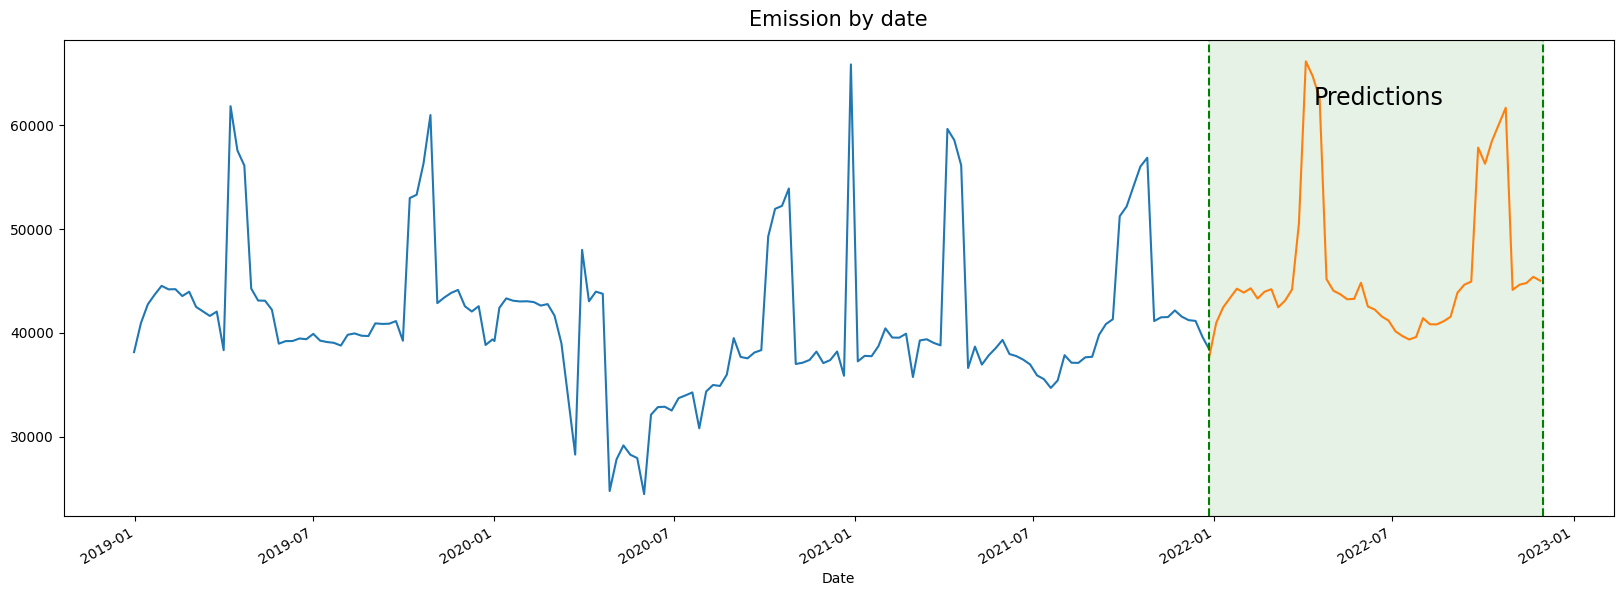

In [47]:
train_plot.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')
pred_plot.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')

plt.axvspan(pd.Timestamp('2021-12-27'), pd.Timestamp('2022-12-01'), color='green', alpha=0.1)
plt.axvline(pd.Timestamp('2021-12-27'), linestyle = "--", color='green')
plt.axvline(pd.Timestamp('2022-12-01'), linestyle = "--", color='green')

plt.text(pd.Timestamp ('2022-04-12'), 62000, "Predictions", size = 17)

plt.title('Emission by date', size=15, pad=10)
plt.show()

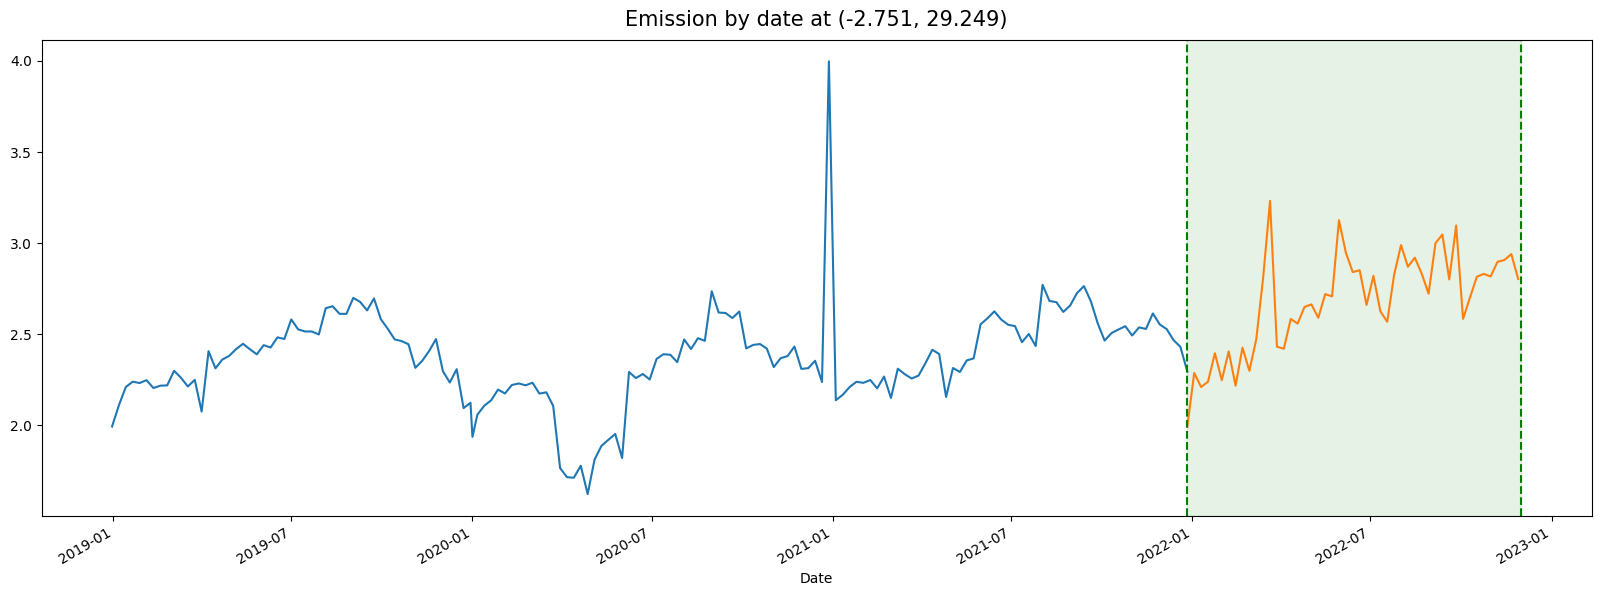

In [48]:
# Emission by date in a random location
rand_latitude, rand_longitude = test.sample()[['latitude', 'longitude']].values.reshape((-1, ))

train_plot[(train_plot['latitude'] == rand_latitude) & (train_plot['longitude'] == rand_longitude)].groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')
pred_plot[(pred_plot['latitude'] == rand_latitude) & (pred_plot['longitude'] == rand_longitude)].groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')

plt.axvspan(pd.Timestamp('2021-12-27'), pd.Timestamp('2022-12-01'), color='green', alpha=0.1)
plt.axvline(pd.Timestamp('2021-12-27'), linestyle = "--", color='green')
plt.axvline(pd.Timestamp('2022-12-01'), linestyle = "--", color='green')

plt.title(f'Emission by date at ({rand_latitude}, {rand_longitude})', size=15, pad=10)
plt.show()

## Save submission

In [50]:
sample_submission.to_csv('./submission.csv')

# Thank you ✨

I hope you enjoyed this notebook and learned something new. 😊 If you did, please consider upvoting it and leaving a comment. I would love to hear your feedback and suggestions. 💬

Also, feel free to fork this notebook and experiment with different models, features, and techniques.

Thank you for reading and happy kaggling! 🚀